In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from streak_finder import Pattern
from streak_finder.src import Structure, draw_line_image, Peaks
from tests.test_streak_finder import generate_image

In [2]:
def generate_image(Y: int, X: int, n_lines: int, length: float, width: float) -> np.ndarray:
    lengths = length * np.random.rand(n_lines)
    thetas = 2 * np.pi * np.random.rand(n_lines)
    x0, y0 = np.array([[X], [Y]]) * np.random.rand(2, n_lines)
    lines = np.stack((x0 - 0.5 * lengths * np.cos(thetas),
                      y0 - 0.5 * lengths * np.sin(thetas),
                      x0 + 0.5 * lengths * np.cos(thetas),
                      y0 + 0.5 * lengths * np.sin(thetas),
                      width * np.ones(n_lines)), axis=1)
    return draw_line_image(lines, (Y, X), kernel='gaussian')

In [32]:
struct = Structure(radius=3, rank=3)
data = np.load('image.npy')
# data = generate_image(50, 50, 10, 20, 3)
mask = np.ones(data.shape, dtype=bool)
pattern = Pattern(data, mask, struct)

In [33]:
peaks = pattern.find_peaks(vmin=0.2, npts=5)

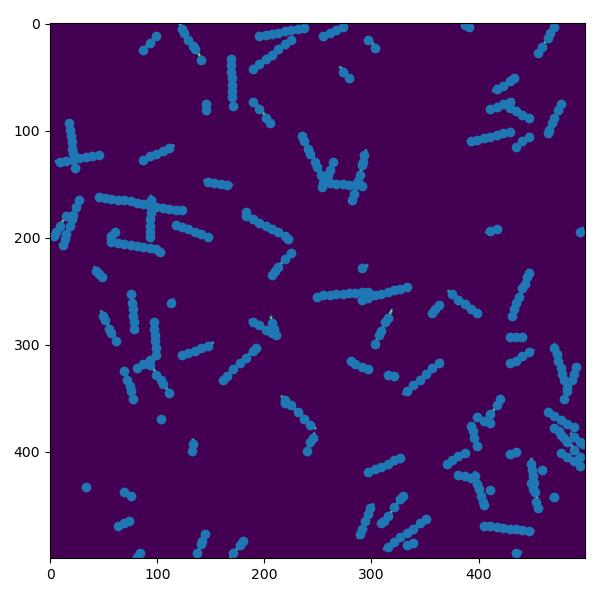

In [34]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(pattern.data)
ax.scatter(peaks.x, peaks.y)

fig.tight_layout()
plt.show()

In [35]:
lines = pattern.find_streaks(peaks, vmin=0.2, xtol=1.8, min_size=1, log_eps=0.0)

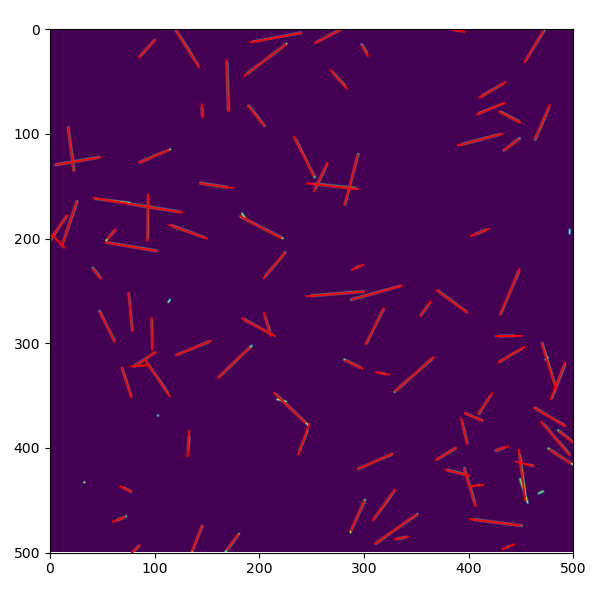

In [36]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(pattern.data)
for line in lines:
    ax.plot(line[::2], line[1::2], c='r')

ax.set_xlim(0, pattern.shape[1])
ax.set_ylim(pattern.shape[0], 0)
fig.tight_layout()
plt.show()